In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import sys
import os

# Dans un notebook, __file__ n'existe pas, on utilise os.getcwd()
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from database.connection import get_db
from sqlalchemy import Column, Integer, String, DateTime, create_engine,text,Text # type: ignore

In [2]:
def get_jobs_from_database() :
    db=get_db()
    jobs=db.execute(text("SELECT * from Jobs;"))
    rows=jobs.fetchall()
    columns=jobs.keys()
    return pd.DataFrame(rows,columns=columns)

In [3]:
df=get_jobs_from_database()

In [4]:
df.head(5)

,id,title,company,location,url,source,scraped_at,salary_min,salary_max,skills,latitude,longitude,is_remote,geocoding_quality,contract_type,seniority
0,1381,Technical leader -Python/ReactJS - Aéronautiqu...,Sopra Steria,Colomiers,/fr/companies/sopra-steria/jobs/technical-lead...,WTTJ,2025-08-10 03:40:54.285135,NaN,NaN,{},43.611248,1.336744,False,exact,CDI,Unknown
1,1382,Lead Developer BackendPython,Idex,Boulogne-Billancourt,/fr/companies/idex-1/jobs/lead-developer-backe...,WTTJ,2025-08-10 03:40:54.506588,NaN,NaN,"{lead,developer}",48.835665,2.240206,False,exact,CDI,Experimente
2,1383,Développeur.se Senior Fullstack (Python/ React...,Ezus,Paris,/fr/companies/ezus/jobs/full-stack-developpeur...,WTTJ,2025-08-10 03:40:54.691215,55000.0,80000.0,"{react,senior}",48.858890,2.320041,False,exact,CDI,Senior
3,1384,DevPythonExpérimenté,Shape It,Lille,/fr/companies/shape-it/jobs/dev-python-experim...,WTTJ,2025-08-10 03:40:54.892010,38000.0,50000.0,{},50.636565,3.063528,False,exact,CDI,Experimente
4,1385,DéveloppeurPython/ React (F/H),Groupe SII,La Défense,/fr/companies/sii/jobs/developpeur-python-reac...,WTTJ,2025-08-10 03:40:55.099377,45000.0,55000.0,{react},48.891008,2.241208,False,exact,CDI,Experimente


In [5]:
df.describe()

,id,scraped_at,salary_min,salary_max,latitude,longitude
count,450.000000,450,1.100000e+02,1.060000e+02,450.000000,450.000000
mean,1605.500000,2025-08-10 03:41:49.923503872,1.080567e+06,1.224177e+06,47.636173,2.165114
min,1381.000000,2025-08-10 03:40:54.285135,0.000000e+00,6.000000e+00,43.295755,-4.486009
25%,1493.250000,2025-08-10 03:41:23.482912512,3.500000e+04,4.086075e+04,46.005407,2.180283
50%,1605.500000,2025-08-10 03:41:51.929212672,4.000000e+04,5.000000e+04,48.853495,2.320041
75%,1717.750000,2025-08-10 03:42:18.012112640,4.785000e+04,6.000000e+04,48.858890,2.348391
max,1830.000000,2025-08-10 03:42:42.154498,6.500000e+07,6.500000e+07,50.636565,7.750713
std,130.048068,NaN,7.779495e+06,8.544801e+06,2.091386,1.792875


In [6]:
df.shape

(450, 16)

In [10]:
df.isnull().sum()

id                     0
title                  0
company                0
location               0
url                    0
source                 0
scraped_at             0
salary_min           340
salary_max           344
skills                 0
latitude               0
longitude              0
is_remote              0
geocoding_quality      0
contract_type          0
seniority              0
dtype: int64

In [22]:
df["salary_min"]=df["salary_min"].fillna("N/A")
df["salary_max"]=df["salary_max"].fillna("N/A")

In [23]:
df.isnull().sum()

id                   0
title                0
company              0
location             0
url                  0
source               0
scraped_at           0
salary_min           0
salary_max           0
skills               0
latitude             0
longitude            0
is_remote            0
geocoding_quality    0
contract_type        0
seniority            0
dtype: int64

In [24]:
df.head(5)

,id,title,company,location,url,source,scraped_at,salary_min,salary_max,skills,latitude,longitude,is_remote,geocoding_quality,contract_type,seniority
0,1381,Technical leader -Python/ReactJS - Aéronautiqu...,Sopra Steria,Colomiers,/fr/companies/sopra-steria/jobs/technical-lead...,WTTJ,2025-08-10 03:40:54.285135,N/A,N/A,{},43.611248,1.336744,False,exact,CDI,Unknown
1,1382,Lead Developer BackendPython,Idex,Boulogne-Billancourt,/fr/companies/idex-1/jobs/lead-developer-backe...,WTTJ,2025-08-10 03:40:54.506588,N/A,N/A,"{lead,developer}",48.835665,2.240206,False,exact,CDI,Experimente
2,1383,Développeur.se Senior Fullstack (Python/ React...,Ezus,Paris,/fr/companies/ezus/jobs/full-stack-developpeur...,WTTJ,2025-08-10 03:40:54.691215,55000.0,80000.0,"{react,senior}",48.858890,2.320041,False,exact,CDI,Senior
3,1384,DevPythonExpérimenté,Shape It,Lille,/fr/companies/shape-it/jobs/dev-python-experim...,WTTJ,2025-08-10 03:40:54.892010,38000.0,50000.0,{},50.636565,3.063528,False,exact,CDI,Experimente
4,1385,DéveloppeurPython/ React (F/H),Groupe SII,La Défense,/fr/companies/sii/jobs/developpeur-python-reac...,WTTJ,2025-08-10 03:40:55.099377,45000.0,55000.0,{react},48.891008,2.241208,False,exact,CDI,Experimente


In [25]:
df["skills"].head(5)

0                  {}
1    {lead,developer}
2      {react,senior}
3                  {}
4             {react}
Name: skills, dtype: object

In [33]:
(df["skills"]=="{}").sum()

154

In [35]:
all_skills=[
            "Python", "JavaScript", "Java", "C++", "PHP", "Ruby", "Go", "Rust", 
            "TypeScript", "C#", "Swift", "Kotlin", "Scala", "R", "MATLAB",

        
      
            "Django", "Flask", "React", "Vue", "Angular", "Spring", "Laravel", 
            "Express", "Rails", ".NET", "FastAPI", "Symfony", "Bootstrap", "jQuery",
  
            "MySQL", "PostgreSQL", "MongoDB", "Redis", "SQLite", "Oracle", 
            "Elasticsearch", "Cassandra", "MariaDB", "DynamoDB",
   
       
            "Docker", "Kubernetes", "Git", "Jenkins", "AWS", "Azure", "GCP", 
            "Terraform", "Ansible", "GitLab", "CircleCI", "Prometheus",
        
        
       
            "Leadership", "Communication", "Autonomie", "Équipe", "Team", 
            "Gestion", "Innovation", "Créativité", "Rigueur", "Adaptabilité", 
            "Organisation", "Management",
       
      
            "développeur", "developer", "dev", "engineer", "ingénieur", 
            "lead", "senior", "junior", "architect", "consultant",
            "full-stack", "backend", "frontend", "devops", "data"
       
]

In [38]:
df["skills"] = df["skills"].apply(lambda x: [] if x == {} or x == "{}" else x)


In [40]:
df.head()

,id,title,company,location,url,source,scraped_at,salary_min,salary_max,skills,latitude,longitude,is_remote,geocoding_quality,contract_type,seniority
0,1381,Technical leader -Python/ReactJS - Aéronautiqu...,Sopra Steria,Colomiers,/fr/companies/sopra-steria/jobs/technical-lead...,WTTJ,2025-08-10 03:40:54.285135,N/A,N/A,[],43.611248,1.336744,False,exact,CDI,Unknown
1,1382,Lead Developer BackendPython,Idex,Boulogne-Billancourt,/fr/companies/idex-1/jobs/lead-developer-backe...,WTTJ,2025-08-10 03:40:54.506588,N/A,N/A,"{lead,developer}",48.835665,2.240206,False,exact,CDI,Experimente
2,1383,Développeur.se Senior Fullstack (Python/ React...,Ezus,Paris,/fr/companies/ezus/jobs/full-stack-developpeur...,WTTJ,2025-08-10 03:40:54.691215,55000.0,80000.0,"{react,senior}",48.858890,2.320041,False,exact,CDI,Senior
3,1384,DevPythonExpérimenté,Shape It,Lille,/fr/companies/shape-it/jobs/dev-python-experim...,WTTJ,2025-08-10 03:40:54.892010,38000.0,50000.0,[],50.636565,3.063528,False,exact,CDI,Experimente
4,1385,DéveloppeurPython/ React (F/H),Groupe SII,La Défense,/fr/companies/sii/jobs/developpeur-python-reac...,WTTJ,2025-08-10 03:40:55.099377,45000.0,55000.0,{react},48.891008,2.241208,False,exact,CDI,Experimente


In [41]:
df.dtypes

id                            int64
title                        object
company                      object
location                     object
url                          object
source                       object
scraped_at           datetime64[ns]
salary_min                   object
salary_max                   object
skills                       object
latitude                    float64
longitude                   float64
is_remote                      bool
geocoding_quality            object
contract_type                object
seniority                    object
dtype: object

In [59]:
df["skills"]=df["skills"].replace("{","")
df["skills"]=df["skills"].replace("}","")

In [60]:
df.head()

,id,title,company,location,url,source,scraped_at,salary_min,salary_max,skills,latitude,longitude,is_remote,geocoding_quality,contract_type,seniority
0,1381,Technical leader -Python/ReactJS - Aéronautiqu...,Sopra Steria,Colomiers,/fr/companies/sopra-steria/jobs/technical-lead...,WTTJ,2025-08-10 03:40:54.285135,N/A,N/A,[],43.611248,1.336744,False,exact,CDI,Unknown
1,1382,Lead Developer BackendPython,Idex,Boulogne-Billancourt,/fr/companies/idex-1/jobs/lead-developer-backe...,WTTJ,2025-08-10 03:40:54.506588,N/A,N/A,"{lead,developer}",48.835665,2.240206,False,exact,CDI,Experimente
2,1383,Développeur.se Senior Fullstack (Python/ React...,Ezus,Paris,/fr/companies/ezus/jobs/full-stack-developpeur...,WTTJ,2025-08-10 03:40:54.691215,55000.0,80000.0,"{react,senior}",48.858890,2.320041,False,exact,CDI,Senior
3,1384,DevPythonExpérimenté,Shape It,Lille,/fr/companies/shape-it/jobs/dev-python-experim...,WTTJ,2025-08-10 03:40:54.892010,38000.0,50000.0,[],50.636565,3.063528,False,exact,CDI,Experimente
4,1385,DéveloppeurPython/ React (F/H),Groupe SII,La Défense,/fr/companies/sii/jobs/developpeur-python-reac...,WTTJ,2025-08-10 03:40:55.099377,45000.0,55000.0,{react},48.891008,2.241208,False,exact,CDI,Experimente


In [ ]:
def convertir_skills(valeur):
    if isinstance(valeur, list):
        return valeur
    if isinstance(valeur, str):
        if valeur == "[]":
            return []
        elif valeur.startswith("{"):
            skills = valeur.strip("{}").split(",")
            return [skill.strip() for skill in skills if skill.strip()]
    if isinstance(valeur, set):
        return list(valeur)
    return []

In [80]:
df['skills_clean'] = df['skills'].apply(convertir_skills)

In [81]:
df.head()

,id,title,company,location,url,source,scraped_at,salary_min,salary_max,skills,latitude,longitude,is_remote,geocoding_quality,contract_type,seniority,skills_clean
0,1381,Technical leader -Python/ReactJS - Aéronautiqu...,Sopra Steria,Colomiers,/fr/companies/sopra-steria/jobs/technical-lead...,WTTJ,2025-08-10 03:40:54.285135,N/A,N/A,[],43.611248,1.336744,False,exact,CDI,Unknown,[]
1,1382,Lead Developer BackendPython,Idex,Boulogne-Billancourt,/fr/companies/idex-1/jobs/lead-developer-backe...,WTTJ,2025-08-10 03:40:54.506588,N/A,N/A,"{lead,developer}",48.835665,2.240206,False,exact,CDI,Experimente,"[lead, developer]"
2,1383,Développeur.se Senior Fullstack (Python/ React...,Ezus,Paris,/fr/companies/ezus/jobs/full-stack-developpeur...,WTTJ,2025-08-10 03:40:54.691215,55000.0,80000.0,"{react,senior}",48.858890,2.320041,False,exact,CDI,Senior,"[react, senior]"
3,1384,DevPythonExpérimenté,Shape It,Lille,/fr/companies/shape-it/jobs/dev-python-experim...,WTTJ,2025-08-10 03:40:54.892010,38000.0,50000.0,[],50.636565,3.063528,False,exact,CDI,Experimente,[]
4,1385,DéveloppeurPython/ React (F/H),Groupe SII,La Défense,/fr/companies/sii/jobs/developpeur-python-reac...,WTTJ,2025-08-10 03:40:55.099377,45000.0,55000.0,{react},48.891008,2.241208,False,exact,CDI,Experimente,[react]


In [84]:
flattened = [item for sublist in df["skills_clean"] for item in sublist]

In [85]:
print(flattened)

['lead', 'developer', 'react', 'senior', 'react', 'senior', 'engineer', 'python', 'c++', 'engineer', 'python', 'senior', 'lead', 'python', 'angular', 'développeur', 'développeur', 'développeur', 'lead', 'python', 'angular', 'développeur', 'developer', 'backend', 'django', 'lead', 'dev', 'backend', 'engineer', 'python', 'senior', 'react', 'react', 'python', 'lead', 'angular', 'python', 'développeur', 'lead', 'ingénieur', 'développeur', 'devops', 'python', 'senior', 'developer', 'typescript', 'lead', 'python', 'engineer', 'engineer', 'python', 'senior', 'ingénieur', 'ingénieur', 'engineer', 'senior', 'lead', 'engineer', 'senior', 'backend', 'senior', 'développeur', 'lead', 'developer', 'lead', 'angular', 'engineer', 'backend', 'lead', 'developer', 'developer', 'ingénieur', 'ingénieur', 'django', 'angular', 'ingénieur', 'développeur', 'react', 'python', 'développeur', 'ingénieur', 'développeur', 'engineer', 'senior', 'engineer', 'python', 'senior', 'backend', 'engineer', 'python', 'aws', 

In [92]:
from collections import Counter
count=Counter(flattened)

In [95]:
print(count)

Counter({'engineer': 93, 'data': 83, 'ingénieur': 61, 'senior': 39, 'lead': 33, 'développeur': 26, 'devops': 22, 'python': 16, 'developer': 14, 'backend': 10, 'react': 9, 'angular': 6, 'c++': 6, 'junior': 6, 'architect': 4, 'django': 4, 'gestion': 4, 'dev': 3, 'aws': 2, '.net': 1, 'ansible': 1, 'consultant': 1, 'go': 1, 'innovation': 1, 'java': 1, 'typescript': 1, 'équipe': 1})


In [101]:
count

[('engineer', 93),
 ('data', 83),
 ('ingénieur', 61),
 ('senior', 39),
 ('lead', 33),
 ('développeur', 26),
 ('devops', 22),
 ('python', 16),
 ('developer', 14),
 ('backend', 10),
 ('react', 9),
 ('angular', 6),
 ('c++', 6),
 ('junior', 6),
 ('architect', 4),
 ('django', 4),
 ('gestion', 4),
 ('dev', 3),
 ('aws', 2),
 ('.net', 1)]

<Figure size 1000x600 with 0 Axes>

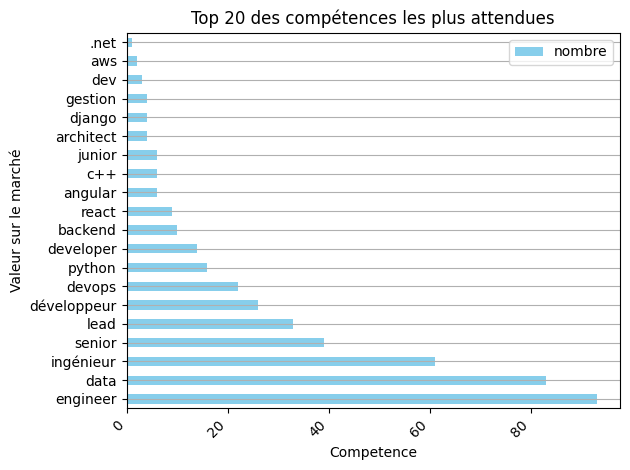

In [113]:
df_count = pd.DataFrame(count, columns=['competence', 'nombre'])
df_count = df_count.set_index('competence')
plt.figure(figsize=(10, 6))
df_count.plot(kind='barh', color='skyblue')

plt.title("Top 20 des compétences les plus attendues")
plt.xlabel("Competence")
plt.ylabel("Valeur sur le marché")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [119]:
df["salary_min"] = pd.to_numeric(df["salary_min"], errors="coerce")
df["salary_max"] = pd.to_numeric(df["salary_max"], errors="coerce")

df["salary_average"] = (df["salary_min"] + df["salary_max"]) / 2


In [120]:
df.head()

,id,title,company,location,url,source,scraped_at,salary_min,salary_max,skills,latitude,longitude,is_remote,geocoding_quality,contract_type,seniority,skills_clean,salary_average
0,1381,Technical leader -Python/ReactJS - Aéronautiqu...,Sopra Steria,Colomiers,/fr/companies/sopra-steria/jobs/technical-lead...,WTTJ,2025-08-10 03:40:54.285135,NaN,NaN,[],43.611248,1.336744,False,exact,CDI,Unknown,[],NaN
1,1382,Lead Developer BackendPython,Idex,Boulogne-Billancourt,/fr/companies/idex-1/jobs/lead-developer-backe...,WTTJ,2025-08-10 03:40:54.506588,NaN,NaN,"{lead,developer}",48.835665,2.240206,False,exact,CDI,Experimente,"[lead, developer]",NaN
2,1383,Développeur.se Senior Fullstack (Python/ React...,Ezus,Paris,/fr/companies/ezus/jobs/full-stack-developpeur...,WTTJ,2025-08-10 03:40:54.691215,55000.0,80000.0,"{react,senior}",48.858890,2.320041,False,exact,CDI,Senior,"[react, senior]",67500.0
3,1384,DevPythonExpérimenté,Shape It,Lille,/fr/companies/shape-it/jobs/dev-python-experim...,WTTJ,2025-08-10 03:40:54.892010,38000.0,50000.0,[],50.636565,3.063528,False,exact,CDI,Experimente,[],44000.0
4,1385,DéveloppeurPython/ React (F/H),Groupe SII,La Défense,/fr/companies/sii/jobs/developpeur-python-reac...,WTTJ,2025-08-10 03:40:55.099377,45000.0,55000.0,{react},48.891008,2.241208,False,exact,CDI,Experimente,[react],50000.0


In [129]:
salary = df["salary_average"].dropna().tolist()


In [130]:
print(salary)

[67500.0, 44000.0, 50000.0, 64000.0, 65000000.0, 1350.0, 1050.0, 52500.0, 40000.0, 41500.0, 65000.0, 72500.0, 41500.0, 40000.0, 55000.0, 45000.0, 50000.0, 90.0, 52500.0, 41500.0, 1500.0, 70000.0, 70000.0, 52500.0, 67500.0, 72500.0, 40000.0, 47500.0, 52500.0, 42500.0, 40000.0, 41000.0, 500.5, 37000.0, 41500.0, 47500.0, 42500.0, 65000.0, 45000.0, 60.0, 55.0, 44000.0, 29000.0, 900.0, 3.0, 3.0, 62500.0, 1350.0, 45.5, 40000.0, 41500.0, 42500.0, 43900.0, 50000.0, 57500.0, 57500.0, 1150.0, 1300.0, 60000.0, 46500.0, 60000.0, 40000.0, 50000.0, 46500.0, 55000.0, 47500.0, 48500.0, 1300.0, 47500.0, 55000.0, 875.0, 46500.0, 26020.0, 38000.0, 34000.0, 45000.0, 40000.0, 51050.0, 45000.0, 55000.0, 75000.0, 56500.0, 950.0, 45000.0, 82500.0, 3400.0, 55000000.0, 40480.5, 40500.0, 30000.0, 37500.0, 37500.0, 70000.0, 45000.0, 44000.0, 51000.0, 47500.0, 1250.0, 55000.0, 55000.0, 40000.0, 60000.0, 53000.0, 1500.0, 50000.0, 72500.0]


In [ ]:

df_with_salary = df[df['salary_average'].notna()]

top_skills = (
    df_with_salary.explode("skills_clean")               
      .groupby("skills_clean")["salary_average"]
      .mean()
      .sort_values(ascending=False).head(10)
)

In [141]:
top_skills

skills_clean
react        1.087398e+07
python       1.086357e+07
engineer     9.259284e+06
senior       5.469713e+06
architect    7.500000e+04
developer    6.125000e+04
backend      6.062500e+04
équipe       5.500000e+04
aws          5.250000e+04
dev          5.250000e+04
Name: salary_average, dtype: float64

In [142]:
df[['salary_min', 'salary_max', 'salary_average']].head(10)

,salary_min,salary_max,salary_average
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,55000.0,80000.0,67500.0
3,38000.0,50000.0,44000.0
4,45000.0,55000.0,50000.0
5,58000.0,70000.0,64000.0
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [154]:

df_clean = df_with_salary[
    (df_with_salary['salary_average'] >= 20000) & 
    (df_with_salary['salary_average'] <= 200000)
]

top_skills_clean = (
    df_clean.explode("skills_clean")               
      .groupby("skills_clean")["salary_average"]
      .mean()
      .sort_values(ascending=False).head(10)
)

In [155]:
top_skills_clean

skills_clean
architect    75000.000000
senior       63650.000000
developer    61250.000000
react        60625.000000
backend      60625.000000
python       60000.000000
lead         59166.666667
data         58571.428571
équipe       55000.000000
dev          52500.000000
Name: salary_average, dtype: float64

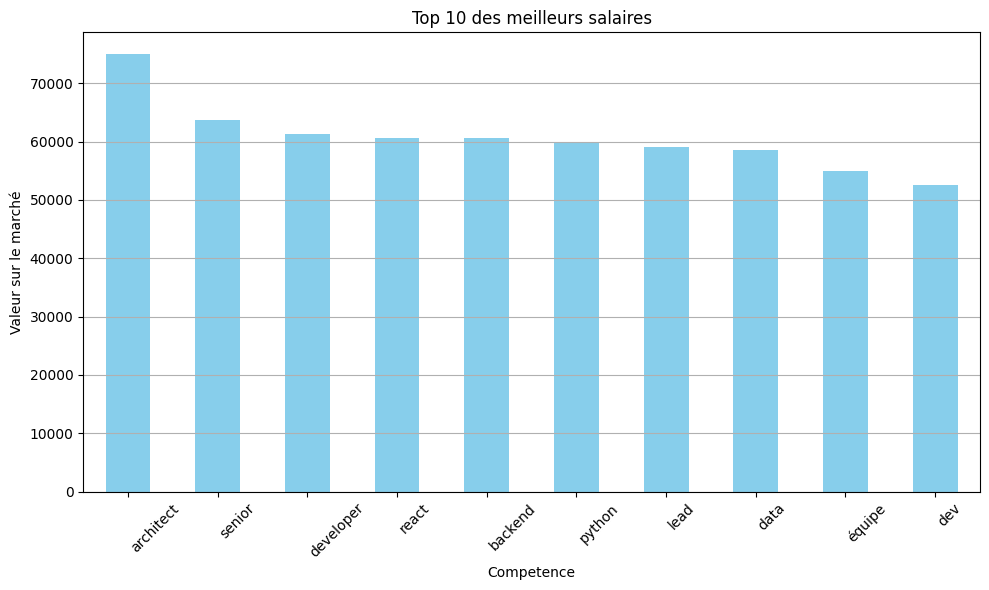

In [156]:

plt.figure(figsize=(10, 6))
top_skills_clean.plot(kind='bar', color='skyblue')

plt.title("Top 10 des meilleurs salaires")
plt.xlabel("Competence")
plt.ylabel("Valeur sur le marché")
plt.xticks(rotation=45, ha='left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Nombre de skills avec fréquence ET salaire: 10
        skill  frequency        salary
1        data         83  58571.428571
3      senior         39  63650.000000
4        lead         33  59166.666667
7      python         16  60000.000000
8   developer         14  61250.000000
9     backend         10  60625.000000
10      react          9  60625.000000
16  architect          4  75000.000000
17        dev          3  52500.000000
26     équipe          1  55000.000000


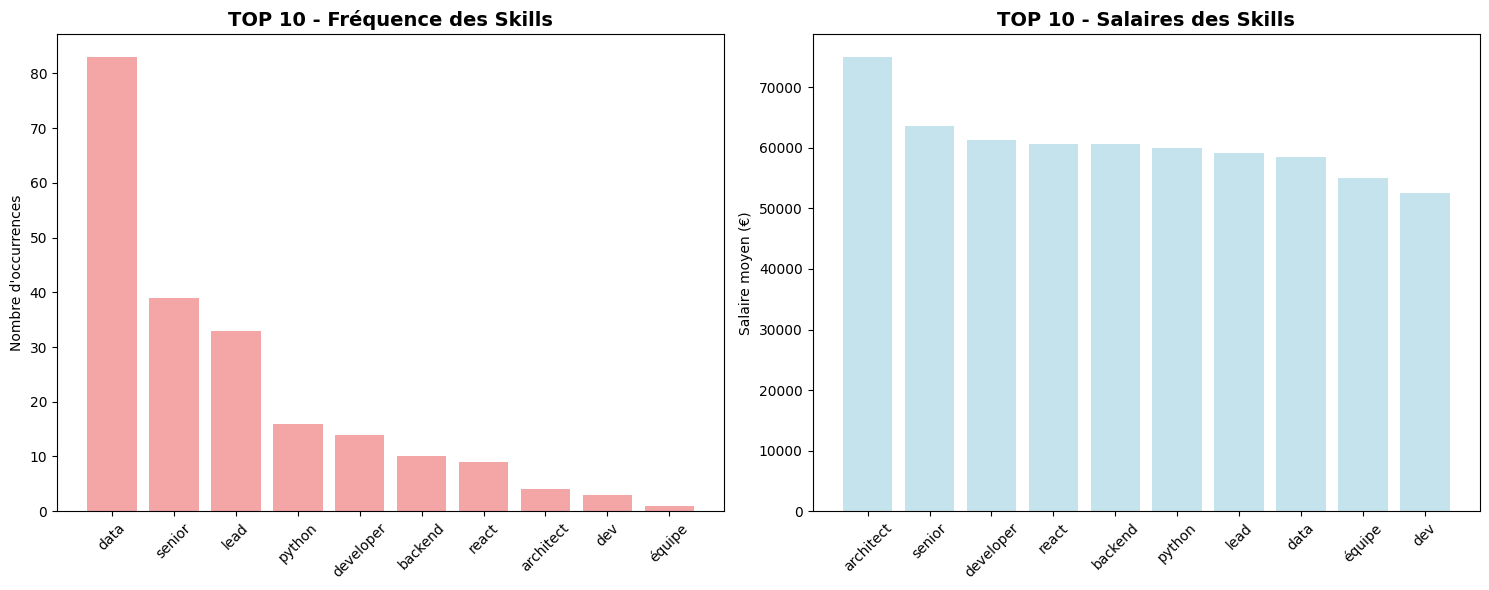

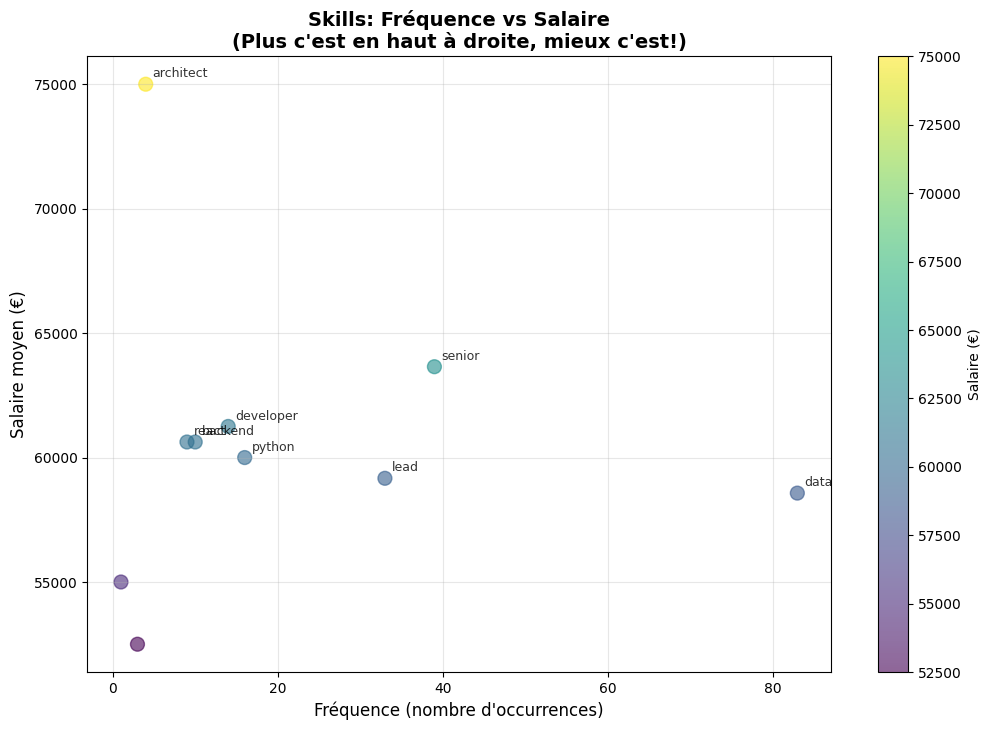


=== ANALYSE DES QUADRANTS ===
Médiane fréquence: 12.0
Médiane salaire: 60312€

🏆 QUADRANT OR (Fréquent + Bien payé):
       skill  frequency   salary
3     senior         39  63650.0
8  developer         14  61250.0

💎 QUADRANT PÉPITES (Rare + Bien payé):
        skill  frequency   salary
16  architect          4  75000.0
9     backend         10  60625.0
10      react          9  60625.0

⚠️ QUADRANT PIÈGE (Fréquent + Mal payé):
    skill  frequency        salary
1    data         83  58571.428571
4    lead         33  59166.666667
7  python         16  60000.000000

😐 QUADRANT MOYEN (Rare + Mal payé):
Nombre de skills: 2 (pas détaillé)

🎯 RECOMMANDATIONS STRATÉGIQUES:
1. APPRENDS EN PRIORITÉ: senior, developer
2. SPÉCIALISE-TOI DANS: backend, react
3. ÉVITE DE TE CONCENTRER UNIQUEMENT SUR: data, lead


In [157]:
top_skills = (
    df_clean.explode("skills_clean")               
      .groupby("skills_clean")
      .size()
      .sort_values(ascending=False).head(10)
)

In [158]:
df_skills_frequency=pd.DataFrame({
    "skill": top_skills.index,
    "frequency": top_skills.values
})

In [164]:
df_skills_frequency["salary"] = df_skills_frequency["skill"].map(top_skills_clean)


In [168]:
df_skills_frequency=df_skills_frequency.dropna()

In [171]:
df_skills_frequency.head(15
                        )

,skill,frequency,salary
1,senior,10,63650.000000
4,data,7,58571.428571
6,react,4,60625.000000
7,backend,4,60625.000000
8,python,3,60000.000000
9,lead,3,59166.666667


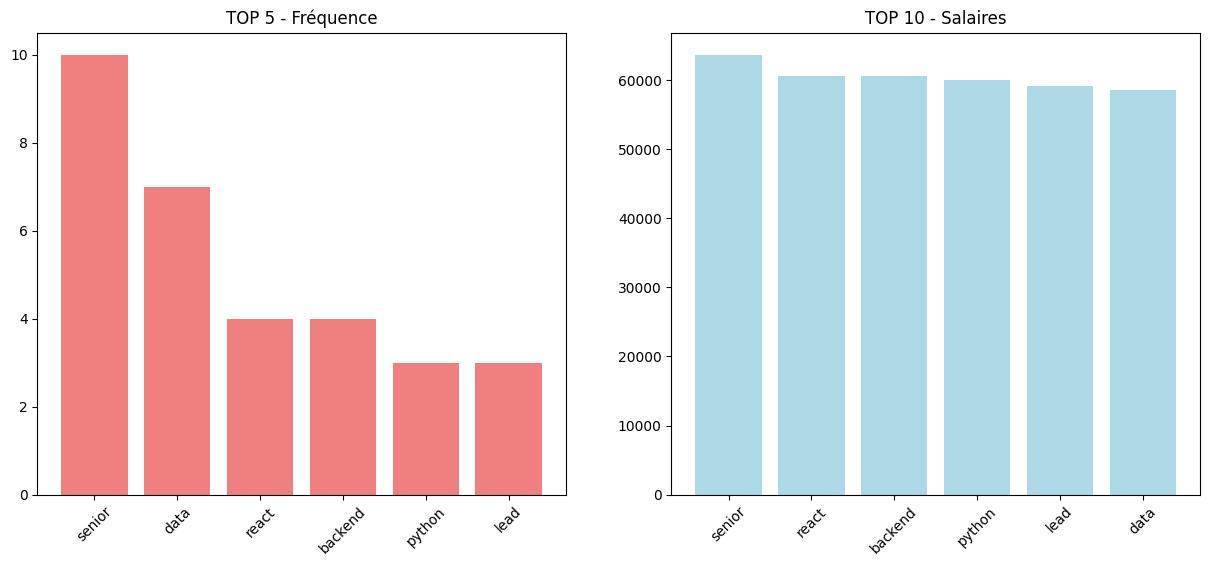

In [206]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
top_freq = df_skills_frequency.nlargest(10, 'frequency')
ax1.bar(top_freq['skill'], top_freq['frequency'], color='lightcoral')
ax1.set_title('TOP 5 - Fréquence')
ax1.tick_params(axis='x', rotation=45)

top_salary = df_skills_frequency.nlargest(10, 'salary')
ax2.bar(top_salary['skill'], top_salary['salary'], color='lightblue')
ax2.set_title('TOP 10 - Salaires')
ax2.tick_params(axis='x', rotation=45)

In [190]:
df_skills_frequency=df_skills_frequency.nlargest(10, 'frequency')

In [192]:
ax1.bar(df_skills_frequency["skill"],df_skills_frequency["frequency"])

<BarContainer object of 6 artists>

In [195]:
df_skills_frequency=df_skills_frequency.nlargest(10, 'salary')

In [196]:
ax2.bar(df_skills_frequency["skill"],df_skills_frequency["salary"])

<BarContainer object of 6 artists>

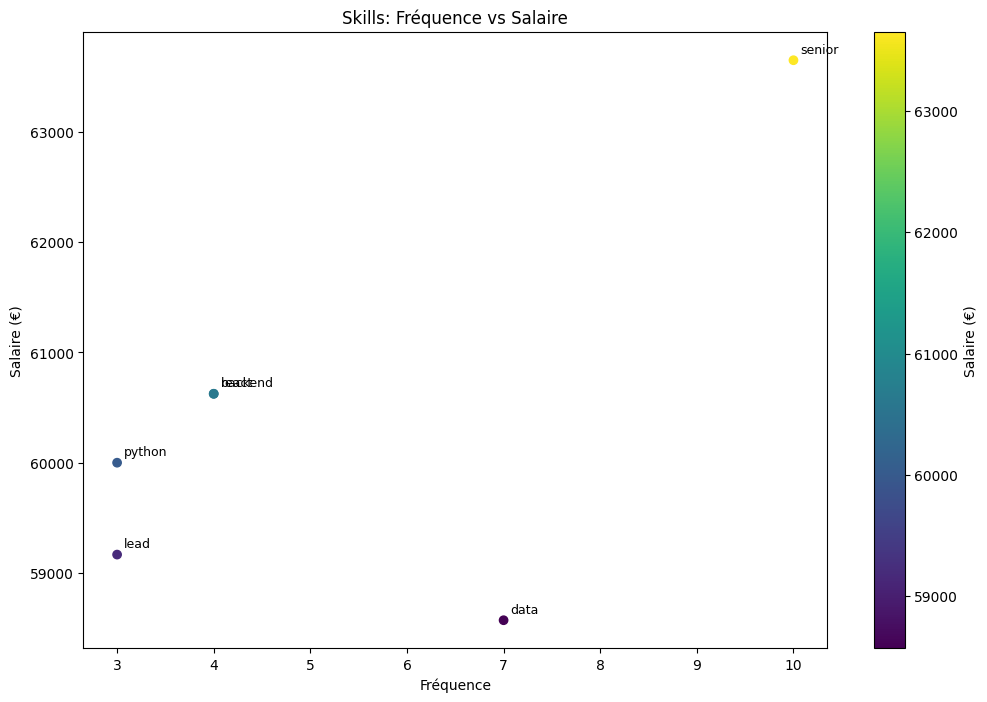

In [203]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_skills_frequency['frequency'], 
                     df_skills_frequency['salary'], 
                     c=df_skills_frequency['salary'], 
                     cmap='viridis')
plt.colorbar(scatter, label='Salaire (€)')
for i, row in df_skills_frequency.iterrows():
    if row['frequency'] > 5 or row['salary'] > 58000:
        plt.annotate(row['skill'], 
                    (row['frequency'], row['salary']),
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=9)
plt.xlabel('Fréquence')
plt.ylabel('Salaire (€)')
plt.title('Skills: Fréquence vs Salaire')
plt.show()

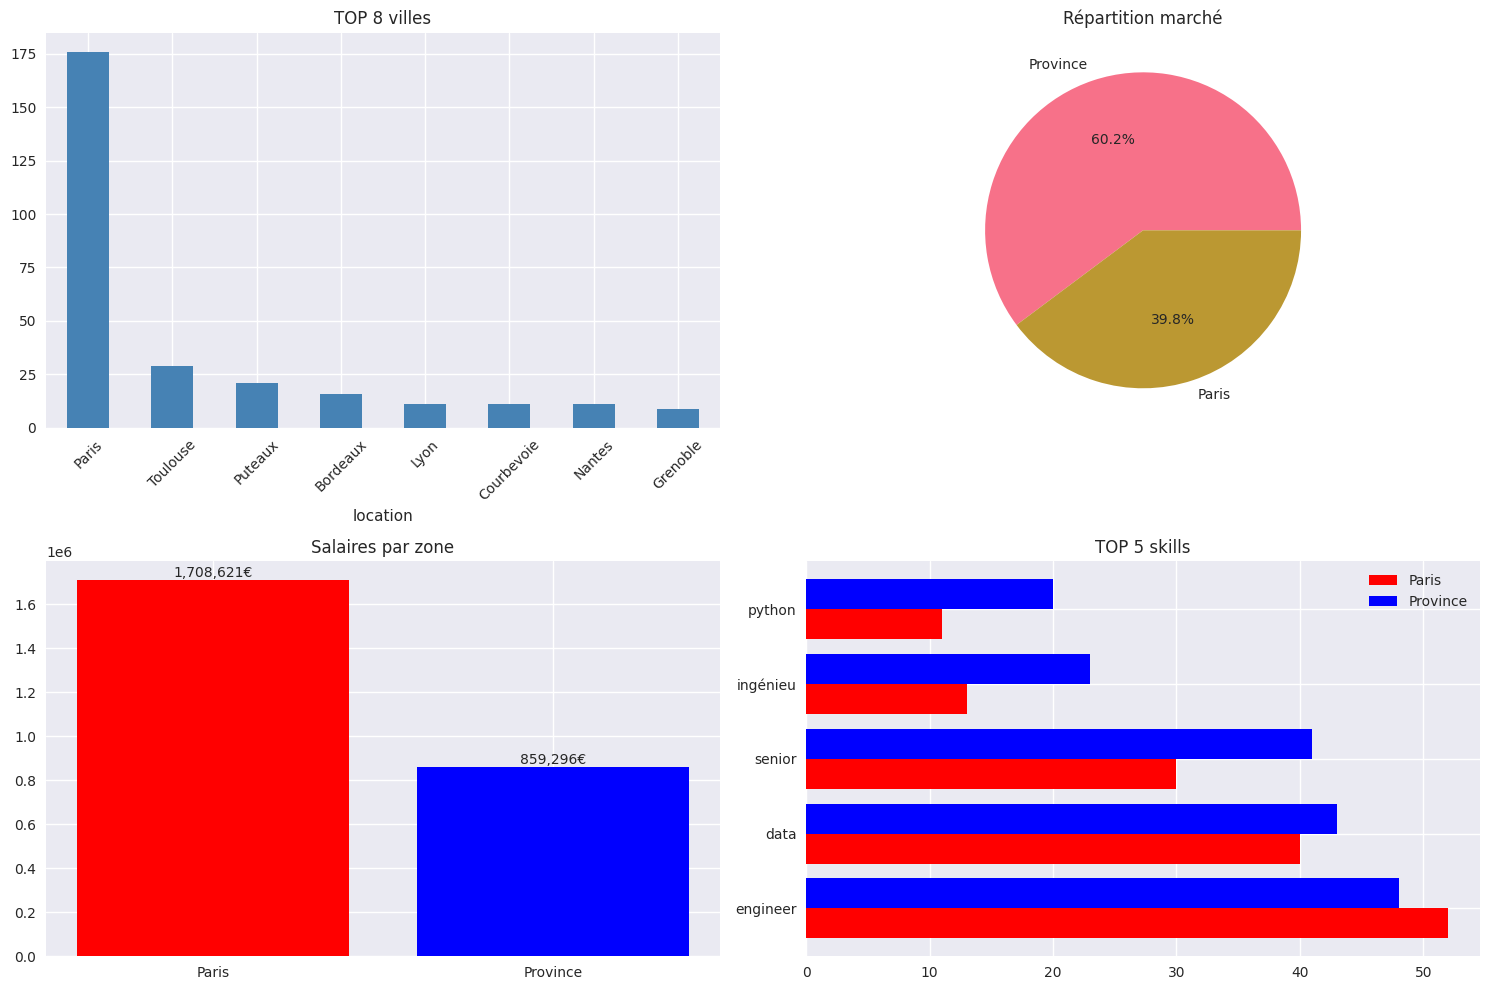

RÉSUMÉ:
Total: 450 offres
Paris: 179 | Province: 271
Écart salaire: +849,324€
Top ville: Paris (176 offres)


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df['zone'] = df['location'].apply(lambda x: 'Paris' if 'Paris' in str(x) or 'Défense' in str(x) else 'Province')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


ville_counts = df['location'].value_counts().head(8)
ville_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('TOP 8 villes')
ax1.tick_params(axis='x', rotation=45)


zone_counts = df['zone'].value_counts()
ax2.pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%')
ax2.set_title('Répartition marché')


df_sal = df[df['salary_average'].notna()]
if len(df_sal) > 0:
    sal_zone = df_sal.groupby('zone')['salary_average'].mean()
    bars = ax3.bar(sal_zone.index, sal_zone.values, color=['red', 'blue'])
    ax3.set_title('Salaires par zone')
    for bar, val in zip(bars, sal_zone.values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                 f'{int(val):,}€', ha='center', va='bottom')

def get_top_skills():
    skills_paris = []
    skills_province = []
    
    for _, row in df.iterrows():
        if isinstance(row['skills_clean'], list):
            if row['zone'] == 'Paris':
                skills_paris.extend(row['skills_clean'])
            else:
                skills_province.extend(row['skills_clean'])
    
    return Counter(skills_paris).most_common(5), Counter(skills_province).most_common(5)

paris_top, province_top = get_top_skills()
skills_p = [x[0] for x in paris_top]
skills_pr = [x[0] for x in province_top]

x = range(5)
ax4.barh([i-0.2 for i in x], [x[1] for x in paris_top], 0.4, label='Paris', color='red')
ax4.barh([i+0.2 for i in x], [x[1] for x in province_top], 0.4, label='Province', color='blue')
ax4.set_yticks(x)
ax4.set_yticklabels([f"{p[:8]}" for p in skills_p])
ax4.set_title('TOP 5 skills')
ax4.legend()

plt.tight_layout()
plt.show()

print("RÉSUMÉ:")
print(f"Total: {len(df)} offres")
print(f"Paris: {zone_counts['Paris']} | Province: {zone_counts['Province']}")
if len(df_sal) > 0:
    ecart = sal_zone['Paris'] - sal_zone['Province']
    print(f"Écart salaire: +{int(ecart):,}€")
print(f"Top ville: {ville_counts.index[0]} ({ville_counts.iloc[0]} offres)")

In [216]:
df.info()
df.describe(
)
df['salary_average'].describe()
df['salary_average'].isna().sum()
df['location'].value_counts().head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 450 non-null    int64         
 1   title              450 non-null    object        
 2   company            450 non-null    object        
 3   location           450 non-null    object        
 4   url                450 non-null    object        
 5   source             450 non-null    object        
 6   scraped_at         450 non-null    datetime64[ns]
 7   salary_min         110 non-null    float64       
 8   salary_max         106 non-null    float64       
 9   skills             450 non-null    object        
 10  latitude           450 non-null    float64       
 11  longitude          450 non-null    float64       
 12  is_remote          450 non-null    bool          
 13  geocoding_quality  450 non-null    object        
 14  contract_t

location
Paris       176
Toulouse     29
Puteaux      21
Bordeaux     16
Lyon         11
Name: count, dtype: int64

In [217]:
df_salary = df[df['salary_average'].notna()]

In [219]:
city_stats = df.groupby('location')['id'].count()
city_stats.head()

location
Aix-En-Provence     6
Angers              1
Annecy              1
Bagnols-Sur-Cèze    1
Beaucouzé           2
Name: id, dtype: int64

In [220]:
city_salaries = df_salary.groupby('location')['salary_average'].mean()
city_salaries.head()

location
Aix-En-Provence     41500.0
Bagnols-Sur-Cèze    30000.0
Blagnac             40000.0
Bordeaux            46500.0
Brignais            45000.0
Name: salary_average, dtype: float64

In [221]:
city_data = pd.DataFrame({'nb_offres': city_stats, 'salaire_moyen': city_salaries})

In [222]:
city_data = city_data.dropna()

In [226]:
city_data.head(5)

,nb_offres,salaire_moyen
location,,
Aix-En-Provence,6,41500.0
Bagnols-Sur-Cèze,1,30000.0
Blagnac,2,40000.0
Bordeaux,16,46500.0
Brignais,1,45000.0


In [227]:
len(city_data)

40

In [228]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()
X = city_data[['nb_offres', 'salaire_moyen']]
X_scaled = scaler.fit_transform(X)

In [230]:
kmeans = KMeans(n_clusters=3, random_state=42)
city_data['cluster'] = kmeans.fit_predict(X_scaled)

In [231]:
city_data['cluster'].value_counts()

cluster
0    38
2     1
1     1
Name: count, dtype: int64

In [232]:
city_data.groupby('cluster').mean()

,nb_offres,salaire_moyen
cluster,,
0,4.605263,3.809628e+04
1,176.000000,1.847034e+06
2,8.000000,1.378500e+07


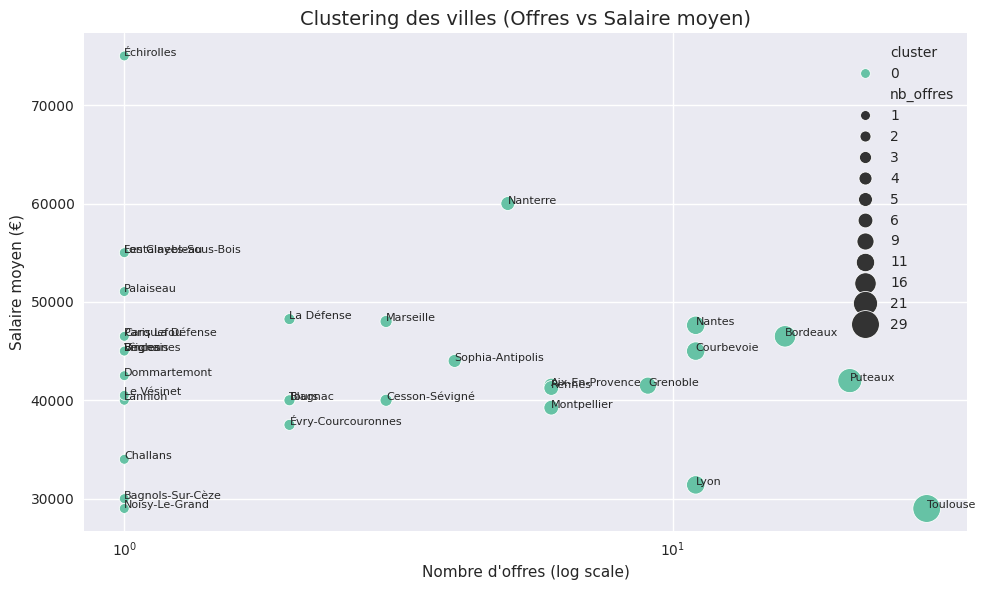

In [237]:
# Supposons qu'on veut garder les salaires annuels entre 15k€ et 120k€
city_data = city_data[
    (city_data['salaire_moyen'] >= 15000) &
    (city_data['salaire_moyen'] <= 120000)
]


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=city_data,
    x='nb_offres',
    y='salaire_moyen',
    hue='cluster',
    size='nb_offres',
    sizes=(50, 400),
    palette='Set2',
    legend='full'
)

# Si beaucoup d'écart entre nb_offres
plt.xscale('log')

# Ajouter les noms des villes sur chaque point
for i in range(len(city_data)):
    plt.text(
        city_data['nb_offres'].iloc[i],
        city_data['salaire_moyen'].iloc[i],
        city_data.index[i],  # le nom de la ville si index = nom
        fontsize=8
    )

plt.title("Clustering des villes (Offres vs Salaire moyen)", fontsize=14)
plt.xlabel("Nombre d'offres (log scale)")
plt.ylabel("Salaire moyen (€)")
plt.tight_layout()

/mnt/c/Users/amine/OneDrive/Documents/projet_market_intelligence/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


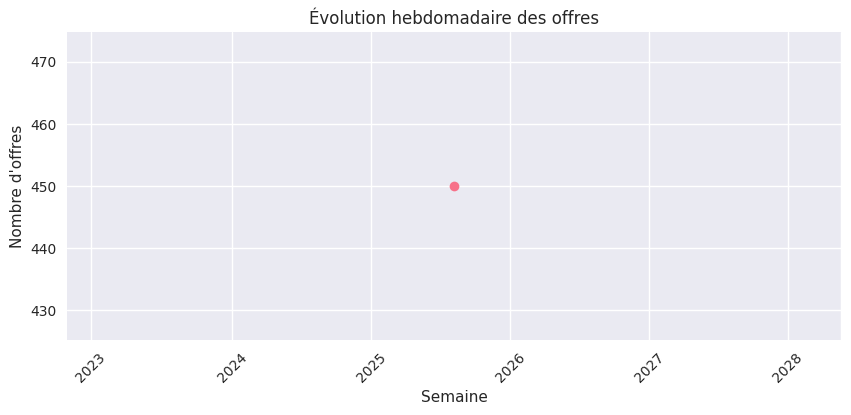

In [242]:
df['scraped_at'] = pd.to_datetime(df['scraped_at'])
offres_temps = df.groupby(df['scraped_at'].dt.to_period('W')).size()

plt.figure(figsize=(10, 4))
offres_temps.plot(kind='line', marker='o')
plt.title("Évolution hebdomadaire des offres")
plt.ylabel("Nombre d'offres")
plt.xlabel("Semaine")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

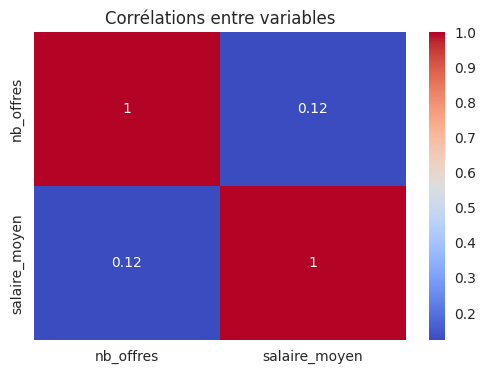

In [245]:
plt.figure(figsize=(6, 4))
sns.heatmap(city_data.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables")
plt.show()